**Importing the libraries**

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

**Importing the datasets**

In [2]:
iris = datasets.load_iris()

In [3]:
#converting the dataset to pandas dataframe
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris = pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])

In [5]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [7]:
#creating species column from target column.0=setosa,1=versicolor,2=virginica
species = []
for i in range(len(iris['target'])):
    if iris['target'][i]==0:
        species.append('Setosa')
    elif iris['target'][i]==1:
        species.append('Versicolor')
    else:
        species.append('Virginica')

iris['species']=species

In [8]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,Setosa
1,4.9,3.0,1.4,0.2,0.0,Setosa
2,4.7,3.2,1.3,0.2,0.0,Setosa
3,4.6,3.1,1.5,0.2,0.0,Setosa
4,5.0,3.6,1.4,0.2,0.0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,Virginica
146,6.3,2.5,5.0,1.9,2.0,Virginica
147,6.5,3.0,5.2,2.0,2.0,Virginica
148,6.2,3.4,5.4,2.3,2.0,Virginica


In [9]:
iris.groupby('species').size()

species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [10]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
#check for missing values

iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

**Data Visualization**

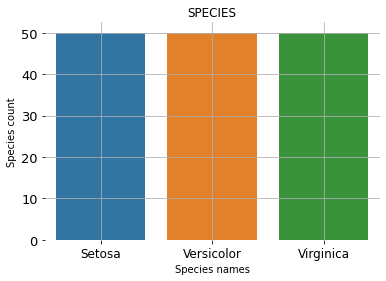

In [12]:
sns.countplot(data=iris,x='species')
plt.title('SPECIES')
plt.ylabel('Species count')
plt.xlabel('Species names')
plt.yticks(fontsize=13)
plt.xticks(fontsize=12,rotation=360)
plt.grid(True)
plt.box(False)
plt.show()

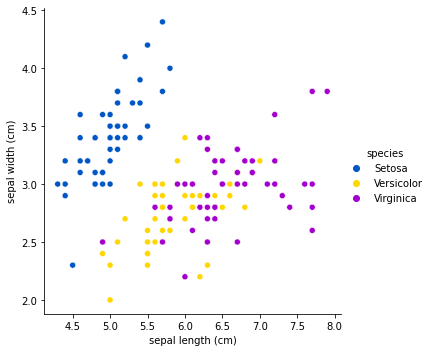

In [13]:
sns.relplot(data=iris,x="sepal length (cm)",y="sepal width (cm)",hue="species",palette='prism')

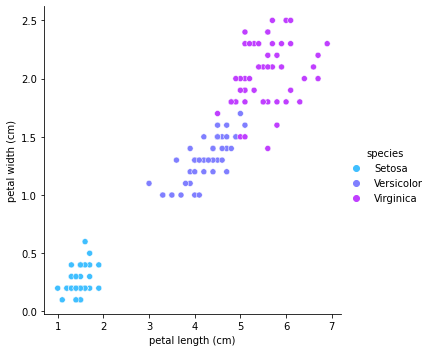

In [14]:
sns.relplot(data=iris,x="petal length (cm)",y="petal width (cm)",hue="species",palette='cool')

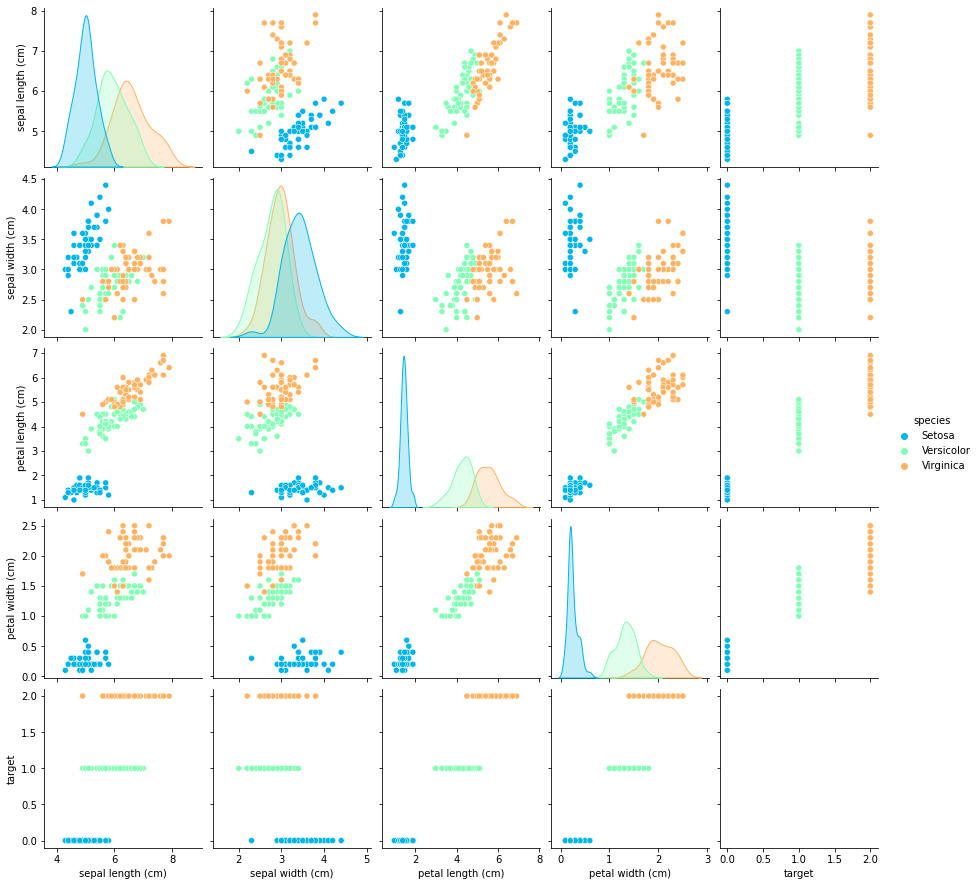

In [41]:
sns.pairplot(iris, hue='species', palette='rainbow')

**Classification Model**

In [16]:
# Setting Target

X = iris.drop(['target','species'],axis=1)
y = iris['target']

In [19]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)


Train Shape

X train shape:  (120, 4)
Y train shape:  (120,)


Test Shape

X test shape:  (30, 4)
Y test shape:  (30,)


In [22]:
# Logistic Regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)

In [23]:
# Confusion Matrix

lr_cm = confusion_matrix(y_test, y_pred1)

print('\nConfusion matrix for Logistic Regression\n\n', lr_cm)


Confusion matrix for Logistic Regression

 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [24]:
# Classification Report
print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_pred1))


Classification Report for Logistic Regression

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
# Test Score
score_lr = lr.score(X_test, y_test)
print('Logistic Regression Score = ',score_lr)

Logistic Regression Score =  1.0


In [26]:
# Gaussian Naive Bayes

nbcla = GaussianNB()

nbcla.fit(X_train, y_train)

y_pred2 = nbcla.predict(X_test)

In [27]:
# Confusion Matrix

nbcla_cm = confusion_matrix(y_test, y_pred2)

print('\nConfusion matrix for Gaussian Naive Bayes Classification\n\n', nbcla_cm)


Confusion matrix for Gaussian Naive Bayes Classification

 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [28]:
# Classification Report
print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_pred2))


Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
# Test Score
score_nbcla = nbcla.score(X_test, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)

Gaussian Naive Bayes Score =  1.0


In [30]:
# Decision Tree

dt = DecisionTreeClassifier(random_state=11)

dt.fit(X_train, y_train)

y_pred3 = dt.predict(X_test)

In [31]:
# Confusion Matrix

dt_cm = confusion_matrix(y_test, y_pred3)

print('\nConfusion matrix for Decision tree classifier\n\n', dt_cm)


Confusion matrix for Decision tree classifier

 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [32]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_pred3))


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

#Prediction of the species from the input vector
prediction = lr.predict(X_new)

print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0. 1. 2.]


/Users/godskid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
